# MTG, Easy as A.B.C.
*By Anthony Broussard, Brandon Pimentel, and Charles Zieres*

Our team is using the data from a Magic: the Gathering (MTG) dataset available [HERE](https://www.kaggle.com/datasets/camilonunez/magic-the-gathering-top8-some-decks-and-events/data)

We will develop a predictive model that estimates the win probability of a given deck in tournaments utilizing the deck's total price as a primary feature. In this project, we aim to understand the relationship between deck price and performance, in order to gauge the extent to which monetary investment has an impact on success chances.

**Background:**

Magic: the Gathering has a rich community and economy amongst its fans, in which cards are actively traded between players. While most cards are only in the order of pennies, some cards are extremely expensive. At its core, card value is determined based on what players are willing to pay for it; however, features such as competitive viability, rarity, and collectibility are common factors that can influence price. 

The question is, then, can we make a clear determination of card value being intrinsically tied to game performance? If this were true, it would imply that the game have a financial limiting factor, restricting success to only the most wealthy players. 

**Environment setup:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

**Preprocessing:**

In [2]:
# Ingest tournament data generated by tournament.py

df = pd.read_csv('./data/tournamentResults.txt', sep='\t')

# Group by 'deckname' and calculate the win rate as the mean of 'winner'
deck_win_rates = df.groupby('deckname').agg(
    total_wins=('winner', 'sum'),  # Total number of wins
    total_games=('winner', 'count'),  # Total number of games played
    average_cost=('deckcost', 'mean')  # Average cost of the deck
).reset_index()

# Calculate the win rate for each deck
deck_win_rates['win_rate'] = deck_win_rates['total_wins'] / deck_win_rates['total_games']



**Exploration & visualization:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87675 entries, 0 to 87674
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   eventid      87675 non-null  int64  
 1   winner       87675 non-null  bool   
 2   players      87675 non-null  int64  
 3   playerid     87675 non-null  int64  
 4   deckname     87605 non-null  object 
 5   deckcost     87675 non-null  float64
 6   sidebarcost  87675 non-null  float64
dtypes: bool(1), float64(2), int64(3), object(1)
memory usage: 4.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7839 entries, 0 to 7838
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   deckname      7839 non-null   object 
 1   total_wins    7839 non-null   int64  
 2   total_games   7839 non-null   int64  
 3   average_cost  7839 non-null   float64
 4   win_rate      7839 non-null   float64
dtypes: float64(2), int64(2), object

<Axes: >

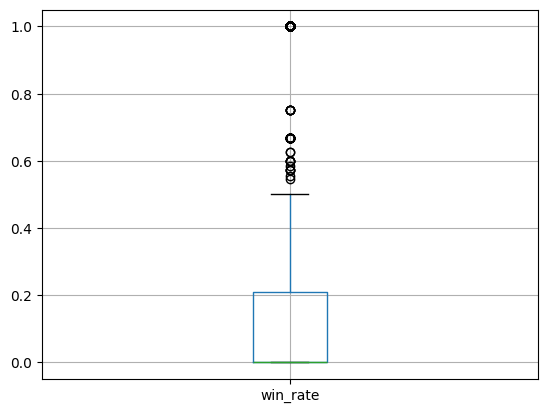

In [3]:
df.info()
df.describe()
deck_win_rates.info()
deck_win_rates.describe()
deck_win_rates.boxplot("win_rate")

**Machine Learning:**

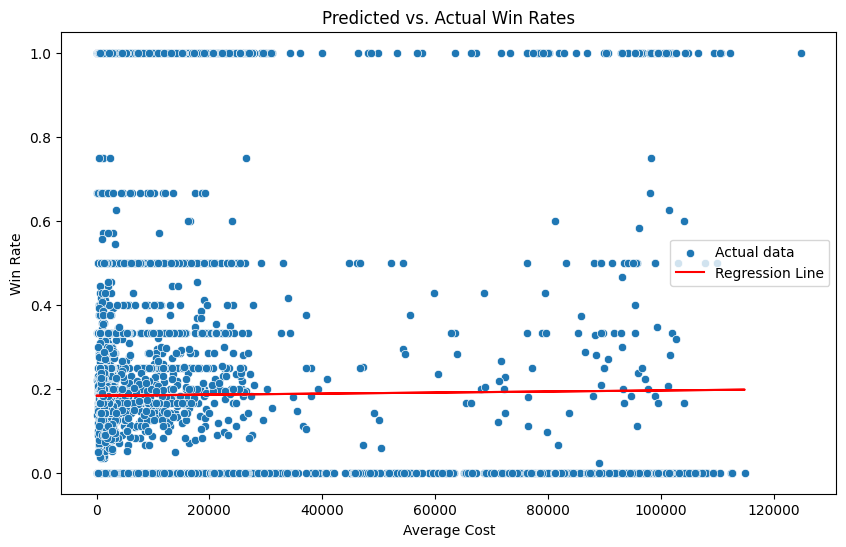

In [24]:
# Features and target variable
X = deck_win_rates[['average_cost']].values  # Feature matrix
y = deck_win_rates['win_rate'].values  # Target variable

# Splitting the dataset into training and testing set (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_test)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=deck_win_rates, x='average_cost', y='win_rate', label='Actual data')
plt.plot(X_test, predictions, color='red', label='Regression Line')
plt.xlabel('Average Cost')
plt.ylabel('Win Rate')
plt.title('Predicted vs. Actual Win Rates')
plt.legend()
plt.show()

In [26]:
# Coefficients
print("Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"  Coefficient for feature {i}: {coef:.4f}")

# Intercept
print(f"Intercept: {model.intercept_:.4f}")

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse:.4f}")

Coefficients:
  Coefficient for feature 0: 0.0000
Intercept: 0.1834
RMSE: 0.3278


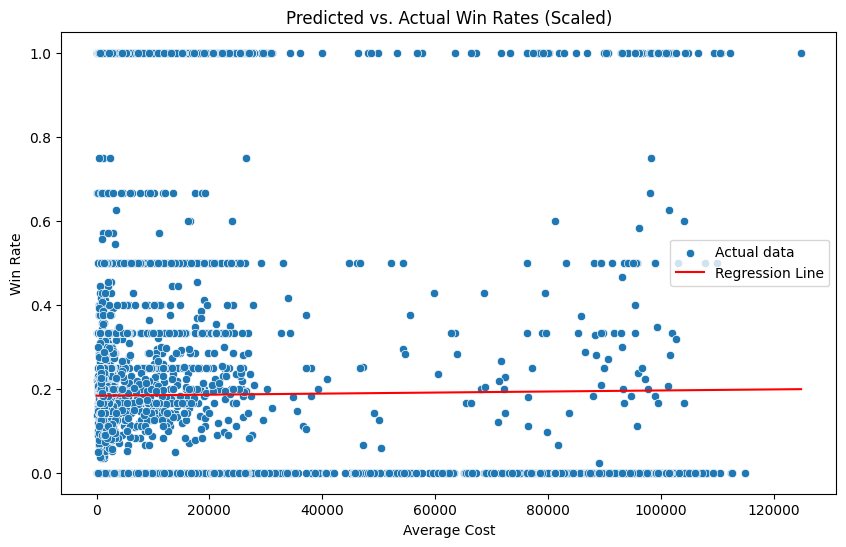

In [29]:
# Features and target variable
X = deck_win_rates[['average_cost']].values  # Feature matrix
y = deck_win_rates['win_rate'].values  # Target variable

# Splitting the dataset into training and testing set (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression().fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

# Generate a range of values within the original average_cost domain
average_cost_range = np.linspace(X.min(), X.max(), num=100).reshape(-1, 1)

# Scale these values using the same scaler
average_cost_range_scaled = scaler.transform(average_cost_range)

# Predict with the model
predictions_range = model.predict(average_cost_range_scaled)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=deck_win_rates, x='average_cost', y='win_rate', label='Actual data')
plt.plot(average_cost_range, predictions_range, color='red', label='Regression Line')
plt.xlabel('Average Cost')
plt.ylabel('Win Rate')
plt.title('Predicted vs. Actual Win Rates (Scaled)')
plt.legend()
plt.show()

In [30]:
# Coefficients
print("Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"  Coefficient for feature {i}: {coef:.4f}")

# Intercept
print(f"Intercept: {model.intercept_:.4f}")

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse:.4f}")

Coefficients:
  Coefficient for feature 0: 0.0027
Intercept: 0.1848
RMSE: 0.3278


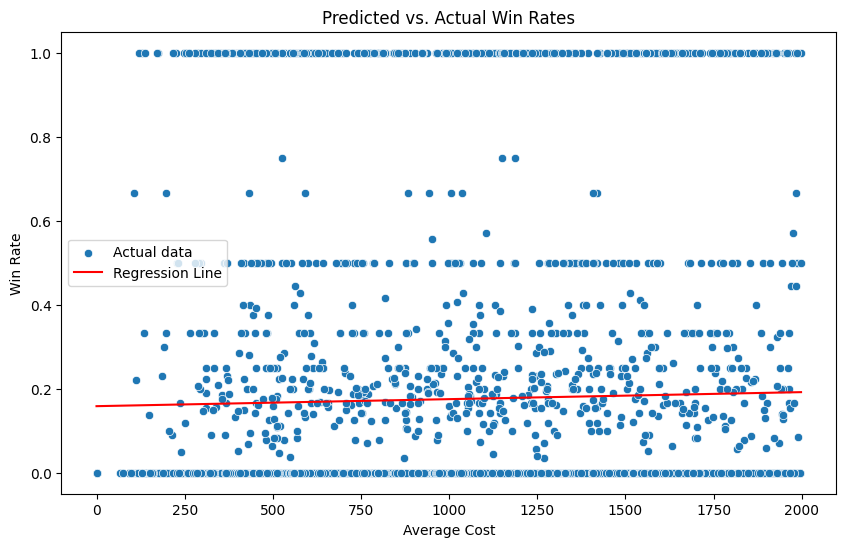

In [14]:
# Since there is a large cluster towards the beginning of the deck, let's look at decks under 2k
decks_under_2k = deck_win_rates[deck_win_rates['average_cost'] < 2000]

# Features and target variable
X = decks_under_2k[['average_cost']].values  # Feature matrix
y = decks_under_2k['win_rate'].values  # Target variable

# Splitting the dataset into training and testing set (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression().fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

# Generate a range of values within the original average_cost domain
average_cost_range = np.linspace(X.min(), X.max(), num=100).reshape(-1, 1)

# Scale these values using the same scaler
average_cost_range_scaled = scaler.transform(average_cost_range)

# Predict with the model
predictions_range = model.predict(average_cost_range_scaled)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=decks_under_2k, x='average_cost', y='win_rate', label='Actual data')
plt.plot(average_cost_range, predictions_range, color='red', label='Regression Line')
plt.xlabel('Average Cost')
plt.ylabel('Win Rate')
plt.title('Predicted vs. Actual Win Rates')
plt.legend()
plt.show()

In [31]:
# Coefficients
print("Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"  Coefficient for feature {i}: {coef:.4f}")

# Intercept
print(f"Intercept: {model.intercept_:.4f}")

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse:.4f}")

Coefficients:
  Coefficient for feature 0: 0.0027
Intercept: 0.1848
RMSE: 0.3278


**Conclusions:**

Based on our team's findings, there does not appear to be a truly linear relationship between deck cost and its winrate. Most people reasonably utilize decks which are sub $2500, and nearly *zero* competitors used decks under $100. It seems, then, that there is a *minimum* price which a deck needs to target to be competitively viable, averaging around $1 per card. 

In retrospect, cards are often valued based on subjective characteristics, such as art, foil, quality, and recency. While cards go up in price when they are found to correspond to a current "meta" build, it appears that most decks have a reasonable chance to win - even in a competitive setting. 